In [ ]:
!pip install -q lucid>=0.2.3

In [ ]:
import numpy as np

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [ ]:
#CSE423(2)
#Group-08
#Fairuz Tarannum-18101199
#Nazibun Nafiz-18101109
#Shaikh Atisha Rahbath Dip-20101241

import math
gl.glClear(gl.GL_COLOR_BUFFER_BIT) 
gl.glPointSize(5) 
gl.glColor3f(0.5, 0.0, 0.0) 


def circlePoint(point1,point2,x,y):
  gl.glBegin(gl.GL_POINTS)
  gl.glVertex2f ((point1+x)/100,(point2+y)/100)
  gl.glVertex2f ((point1+y)/100,(point2+x)/100)
  gl.glVertex2f ((point1+y)/100,(point2-x)/100)
  gl.glVertex2f ((point1+x)/100,(point2-y)/100)
  gl.glVertex2f ((point1-x)/100,(point2-y)/100)
  gl.glVertex2f ((point1-y)/100,(point2-x)/100)
  gl.glVertex2f ((point1-y)/100,(point2+x)/100)
  gl.glVertex2f ((point1-x)/100,(point2+y)/100)
  
  gl.glEnd()
  


def midpointCircle (rad,x1,y1):
  radius = rad
  x = 0
  y = radius 
  d = 1-radius
  circlePoint(x1,y1,x,y)  
  
  while (x<y):
    if d<0 :
      d = d+2*x +3
      x = x+1
      
    else:
      d = d+2*x -2*y +5
      x = x+1
      y = y-1
    
    circlePoint(x1,y1,x,y)

def findZone (x1,y1,x2,y2):
  dy = y2-y1
  dx = x2-x1
  if abs(dx) > abs(dy):
    if dx>=0 and dy>=0 :
      return 0
    elif dx<0 and dy>=0:
      return 3
    elif dx<0 and dy<0:
      return 4
    elif dx>=0 and dy<0:
      return 7

  else:
    if dx>=0 and dy>=0 :
      return 1
    elif dx<0 and dy>=0:
      return 2
    elif dx<0 and dy<0:
      return 4
    elif dx>=0 and dy<0:
      return 6

def convertTozero (zone,x,y):
  if zone == 0:
    return x,y
  if zone == 1:
    return y,x
  if zone == 2:
    return y,-x
  if zone == 3:
    return -x,y
  if zone == 4:
    return -x,-y
  if zone == 5:
    return -y,-x
  if zone == 6:
    return -y,x
  if zone == 7:
    return x,-y

def backToriginal (zone,X,Y):
  if zone == 0:
    return X,Y
  if zone == 1:
    return Y,X
  if zone == 2:
    return -Y,X
  if zone == 3:
    return -X,Y
  if zone == 4:
    return -X,-Y
  if zone == 5:
    return -Y,-X
  if zone == 6:
    return Y,-X
  if zone == 7:
    return X,-Y

gl.glClear(gl.GL_COLOR_BUFFER_BIT)
gl.glPointSize(3)


def midpoint(x1,y1,x2,y2):  
  zone = findZone(x1,y1,x2,y2)
  point= convertTozero(zone,x1,y1)
  x1=point[0]
  y1=point[1]
  point2 = convertTozero(zone,x2,y2)
  x2 = point2[0]
  y2 = point2[1]
  dx=x2-x1
  dy=y2-y1
  D=2*dy-dx
  x=x1
  y=y1
  while(x<=x2):
    point3=backToriginal(zone,x,y)
    x3=point3[0]
    y3=point3[1]
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(x3/100,y3/100)
    gl.glEnd()
    x+= 1
    if (D>0):
      y= y+1  
      D=D+ 2*(dy-dx)
    else:
      D=D+2*dy

def draw_points(x, y):
    gl.glPointSize(2) 
    gl.glBegin(gl.GL_POINTS) 
    gl.glColor3f(0.67, 0.6, 0.16) #middle robot color select
    gl.glVertex2f(x, y) 
    gl.glEnd() 


def convertZone0(x1, y1, zone): 

    if zone == 0: 
        pass 

    elif zone == 1: 
        x1,y1 = y1,x1 
    elif zone == 2: 
        x1,y1 = y1,-x1 
    elif zone == 3: 
        x1,y1 = -x1,y1 
    elif zone == 4: 
        x1,y1 = -x1,-y1 
    elif zone == 5: 
        x1,y1 = -y1,-x1 
    elif zone == 6: 
        x1,y1 = -y1,x1
    elif zone == 7: 
        x1,y1 = x1,-y1 

    return x1, y1 


def org_zone(x1, y1, zone): 

    if zone == 0: 
        pass 

    elif zone == 1: 
        x1,y1 = y1,x1 
    elif zone == 2:
        x1,y1 = -y1,x1
    elif zone == 3: 
        x1,y1 = -x1,y1 
    elif zone == 4: 
        x1,y1 = -x1,-y1 
    elif zone == 5: 
        x1,y1 = -y1,-x1 
    elif zone == 6: 
        x1,y1 = y1,-x1
    elif zone == 7: 
        x1,y1 = x1,-y1 

    return x1, y1     


def midPoint(x1, y1, x2, y2): 
    zone = FindZone(x1, y1, x2, y2) 
    draw_points(x1, y1) 
    x1, y1 = convertZone0(x1, y1, zone) 
    x2, y2 = convertZone0(x2, y2, zone) 
    dx = x2 - x1 
    dy = y2 - y1 
    d = 2*dy - dx  
    x = x1 
    y = y1



    while (x < x2): 
        x = x + .01 
        if (d < 0): 
            d = d + 2*dy 
        else: 
            d = d + 2*(dy - dx) 
            y = y + .01 
        x_new, y_new = org_zone(x, y, zone) 
        draw_points(x_new, y_new) 


def FindZone(x1, y1, x2, y2): 
    dx = (x2-x1) 
    dy =(y2-y1) 
    zone = None 
    if (abs(dx) >= abs(dy)): 
        if (dx >= 0 and dy >= 0): 
            zone = 0
        if (dx < 0 and dy >= 0): 
            zone = 3 
        if (dx < 0 and dy < 0): 
            zone = 4 
        if (dx >= 0 and dy < 0): 
            zone = 7 


    elif (abs(dy) > abs(dx)): 
        if (dx >= 0 and dy >= 0): 
            zone = 1 
        if (dx < 0 and dy >= 0): 
            zone = 2 
        if (dx < 0 and dy < 0): 
            zone = 5 
        if (dx >= 0 and dy < 0): 
            zone = 6 
    return zone 

action = input("Please enter your action between go/stop/die: ")

if action == 'stop':


  #MIDDLE ROBOT
  #BODY
  midPoint(-0.15,0.2,0.15,0.2)
  midPoint(-0.15,-0.2,0.15,-0.2)
  midPoint(-0.15,0.2,-0.15,-0.2)
  midPoint(0.15,0.2,0.15,-0.2)

  #HEAD
  midPoint(-0.1,0.3,-0.1,0.5)
  midPoint(-0.1,0.3,0.1,0.3)
  midPoint(0.1,0.3,0.1,0.5)
  midPoint(-0.1,0.5,0.1,0.5)
  #LEFT LEG
  midPoint(-0.125,-0.3,-0.05,-0.3)
  midPoint(-0.125,-0.6,-0.05,-0.6)
  midPoint(-0.125,-0.3,-0.125,-0.6)
  midPoint(-0.05,-0.3,-0.05,-0.6)

  #RIGHT LEG
  midPoint(0.125,-0.3,0.05,-0.3)
  midPoint(0.125,-0.6,0.05,-0.6)
  midPoint(0.125,-0.3,0.125,-0.6)
  midPoint(0.05,-0.3,0.05,-0.6)

  #RIGHT HAND
  midPoint(0.2,0.15,0.26,0.15)
  midPoint(0.2,-0.15,0.26,-0.15)
  midPoint(0.2,-0.15,0.2,0.15)
  midPoint(0.26,-0.15,0.26,0.15)

  #TRANSFORMATION OF LEFT HAND
  a = math.cos(math.radians(45))
  b = math.sin(math.radians(45))
  
  r = np.array([[a, -b, 0],
             [b, a, 0],
             [0, 0, 1]])

  sc = 1.5
  s = np.array([[sc, 0, 0],
             [0, sc, 0],
             [0, 0, 1]])

  rs = np.matmul(r,s) 

  v1 = np.array([[-0.1],
              [0.4],
              [1]])
  v2 = np.array([[-0.05],
              [0.4],
              [1]])
  v3 = np.array([[-0.05],
              [0.15],
              [1]])
  v4 = np.array([[-0.1],
              [0.15],
              [1]])


  v11 = np.matmul(rs,v1)
  v22 = np.matmul(rs,v2)
  v33 = np.matmul(rs,v3)
  v44 = np.matmul(rs,v4)


  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(v11[0][0],v11[1][0])
  gl.glVertex2f(v22[0][0],v22[1][0])
  gl.glVertex2f(v33[0][0],v33[1][0])
  gl.glVertex2f(v44[0][0],v44[1][0])
  gl.glEnd()

  #MIDDLE ROBOT EYES
  midpointCircle(1,-5,40)
  midpointCircle(1,5,40)

  #STOP SIGN
  gl.glColor3f(1,0,0)
  midpoint(-58,50,-42,40)
  midpointCircle(10,-50,45)

  ######################################################################

  #ROAD 2 FOR MIDDLE ROBOT
  gl.glColor3f(0.51, 0.52, 0.51)
  midpoint(-35,-70,-20,-10)
  midpoint(15,-75,30,-12)
  print("The Robot is asking to STOP the vehicals")


####################################################################

if action == 'die':
  #LEFT ROBOT
  #BODY
  gl.glColor3f(0.39, 0.02, 0.18)

  #TRANSFORMATION LEFT ROBOT BODY
  lba = math.cos(math.radians(0))
  lbb = math.sin(math.radians(0))

  lbr = np.array([[lba, -lbb, 0],
               [lbb, lba, 0],
               [0, 0, 1]])

  lbsc = 0.5
  lbs = np.array([[lbsc, 0, 0],
               [0, lbsc, 0],
               [0, 0, 1]])

  lbrs = np.matmul(lbr,lbs)
 
  lbv1 = np.array([[-0.9],
                [0.2],
                [1]])
  lbv2 = np.array([[-1.2],
                [0.2],
                [1]])
  lbv3 = np.array([[-1.2],
                [-0.2],
                [1]])
  lbv4 = np.array([[-0.9],
                [-0.2],
                [1]])

  lbv11 = np.matmul(lbrs,lbv1)
  lbv22 = np.matmul(lbrs,lbv2)
  lbv33 = np.matmul(lbrs,lbv3)
  lbv44 = np.matmul(lbrs,lbv4)


  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(lbv11[0][0],lbv11[1][0])
  gl.glVertex2f(lbv22[0][0],lbv22[1][0])
  gl.glVertex2f(lbv33[0][0],lbv33[1][0])
  gl.glVertex2f(lbv44[0][0],lbv44[1][0])
  gl.glEnd()


  #TRANSFORMATION LEFT ROBOT LEFT HAND
  llha = math.cos(math.radians(0))
  llhb = math.sin(math.radians(0))

  llhr = np.array([[llha, -llhb, 0],
               [llhb, llha, 0],
               [0, 0, 1]])

  llhsc = 0.5
  llhs = np.array([[llhsc, 0, 0],
               [0, llhsc, 0],
               [0, 0, 1]])

  llhrs = np.matmul(llhr,llhs)

  llhv1 = np.array([[-1.25],
                [0.15],
                [1]])
  llhv2 = np.array([[-1.35],
                [0.15],
                [1]])
  llhv3 = np.array([[-1.35],
                [-0.15],
                [1]])
  llhv4 = np.array([[-1.25],
                [-0.15],
                [1]])

  llhv11 = np.matmul(llhrs,llhv1)
  llhv22 = np.matmul(llhrs,llhv2)
  llhv33 = np.matmul(llhrs,llhv3)
  llhv44 = np.matmul(llhrs,llhv4)


  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(llhv11[0][0],llhv11[1][0])
  gl.glVertex2f(llhv22[0][0],llhv22[1][0])
  gl.glVertex2f(llhv33[0][0],llhv33[1][0])
  gl.glVertex2f(llhv44[0][0],llhv44[1][0])
  gl.glEnd()


  #TRANSFORMATION LEFT ROBOT RIGHT HAND
  lrha = math.cos(math.radians(0))
  lrhb = math.sin(math.radians(0))

  lrhr = np.array([[lrha, -lrhb, 0],
               [lrhb, lrha, 0],
               [0, 0, 1]])

  lrhsc = 0.5
  lrhs = np.array([[lrhsc, 0, 0],
               [0, lrhsc, 0],
               [0, 0, 1]])

  lrhrs = np.matmul(lrhr,lrhs)

  lrhv1 = np.array([[-0.76],
                [0.15],
                [1]])
  lrhv2 = np.array([[-0.86],
                [0.15],
                [1]])
  lrhv3 = np.array([[-0.86],
                [-0.15],
                [1]])
  lrhv4 = np.array([[-0.76],
                [-0.15],
                [1]])

  lrhv11 = np.matmul(lrhrs,lrhv1)
  lrhv22 = np.matmul(lrhrs,lrhv2)
  lrhv33 = np.matmul(lrhrs,lrhv3)
  lrhv44 = np.matmul(lrhrs,lrhv4)


  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(lrhv11[0][0],lrhv11[1][0])
  gl.glVertex2f(lrhv22[0][0],lrhv22[1][0])
  gl.glVertex2f(lrhv33[0][0],lrhv33[1][0])
  gl.glVertex2f(lrhv44[0][0],lrhv44[1][0])
  gl.glEnd()

  #TRANSFORMATION LEFT ROBOT RIGHT LEG
  lrha = math.cos(math.radians(0))
  lrhb = math.sin(math.radians(0))

  lrhr = np.array([[lrha, -lrhb, 0],
               [lrhb, lrha, 0],
               [0, 0, 1]])

  lrhsc = 0.5
  lrhs = np.array([[lrhsc, 0, 0],
               [0, lrhsc, 0],
               [0, 0, 1]])

  lrhrs = np.matmul(lrhr,lrhs)

  lrhv1 = np.array([[-0.99],
                [-0.25],
                [1]])
  lrhv2 = np.array([[-0.90],
                [-0.25],
                [1]])
  lrhv3 = np.array([[-0.80],
                [-0.45],
                [1]])
  lrhv4 = np.array([[-0.85],
                [-0.45],
                [1]])

  lrhv11 = np.matmul(lrhrs,lrhv1)
  lrhv22 = np.matmul(lrhrs,lrhv2)
  lrhv33 = np.matmul(lrhrs,lrhv3)
  lrhv44 = np.matmul(lrhrs,lrhv4)


  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(lrhv11[0][0],lrhv11[1][0])
  gl.glVertex2f(lrhv22[0][0],lrhv22[1][0])
  gl.glVertex2f(lrhv33[0][0],lrhv33[1][0])
  gl.glVertex2f(lrhv44[0][0],lrhv44[1][0])
  gl.glEnd()


  #TRANSFORMATION LEFT ROBOT RIGHT LEG
  lrla = math.cos(math.radians(0))
  lrlb = math.sin(math.radians(0))

  lrlr = np.array([[lrla, -lrlb, 0],
               [lrlb, lrla, 0],
               [0, 0, 1]])

  lrlsc = 0.5
  lrls = np.array([[lrlsc, 0, 0],
               [0, lrlsc, 0],
               [0, 0, 1]])

  lrlrs = np.matmul(lrlr,lrls)

  lrlv1 = np.array([[-1.10],
                [-0.25],
                [1]])
  lrlv2 = np.array([[-1.20],
                [-0.25],
                [1]])
  lrlv3 = np.array([[-1.30],
                [-0.45],
                [1]])
  lrlv4 = np.array([[-1.25],
                [-0.45],
                [1]])

  lrlv11 = np.matmul(lrlrs,lrlv1)
  lrlv22 = np.matmul(lrlrs,lrlv2)
  lrlv33 = np.matmul(lrlrs,lrlv3)
  lrlv44 = np.matmul(lrlrs,lrlv4)


  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(lrlv11[0][0],lrlv11[1][0])
  gl.glVertex2f(lrlv22[0][0],lrlv22[1][0])
  gl.glVertex2f(lrlv33[0][0],lrlv33[1][0])
  gl.glVertex2f(lrlv44[0][0],lrlv44[1][0])
  gl.glEnd()


  #WIRES 
  gl.glColor3f(1,0,0)
  midpoint(-52,10,-56,20)
  midpoint(-52,10,-48,18)
  midpoint(-52,10,-53,22)
  midpoint(-52,10,-59,18)

 ############################################################################
  #ROAD 1 FOR LEFT ROBOT
  gl.glColor3f(0.49, 0.53, 0.52)
  midpoint(-55,-70,-30,-5)
  midpoint(-92,-70,-70,-10)

  print("The Robot was hit by a car")

#########################################################################

if action == 'go':
  #RIGHT ROBOT
  #BODY

  #TRANSFORMATION RIGHT ROBOT HEAD
  gl.glColor3f(0.19, 0.74, 0.63)
  rha = math.cos(math.radians(0))
  rhb = math.sin(math.radians(0))


  rhr = np.array([[rha, -rhb, 0],
               [rhb, rha, 0],
               [0, 0, 1]])

  rhsc = 1.5
  rhs = np.array([[rhsc, 0, 0],
               [0, rhsc, 0],
               [0, 0, 1]])

  rhrs = np.matmul(rhr,rhs)

  rhv1 = np.array([[0.3],
                [0.25],
                [1]])
  rhv2 = np.array([[0.3],
                [0.45],
                [1]])
  rhv3 = np.array([[0.48],
                [0.45],
                [1]])
  rhv4 = np.array([[0.48],
                [0.25],
                [1]])

  rhv11 = np.matmul(rhrs,rhv1)
  rhv22 = np.matmul(rhrs,rhv2)
  rhv33 = np.matmul(rhrs,rhv3)
  rhv44 = np.matmul(rhrs,rhv4)

  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(rhv11[0][0],rhv11[1][0])
  gl.glVertex2f(rhv22[0][0],rhv22[1][0])
  gl.glVertex2f(rhv33[0][0],rhv33[1][0])
  gl.glVertex2f(rhv44[0][0],rhv44[1][0])
  gl.glEnd()


  #TRANSFORMATION RIGHT ROBOT BODY
  rha = math.cos(math.radians(0))
  rhb = math.sin(math.radians(0))

  rhr = np.array([[rha, -rhb, 0],
               [rhb, rha, 0],
               [0, 0, 1]])

  rhsc = 1.5
  rhs = np.array([[rhsc, 0, 0],
               [0, rhsc, 0],
               [0, 0, 1]])

  rhrs = np.matmul(rhr,rhs)

  rhv1 = np.array([[0.26],
                [0.18],
                [1]])
  rhv2 = np.array([[0.26],
                [-.20],
                [1]])
  rhv3 = np.array([[0.52],
                [-.20],
                [1]])
  rhv4 = np.array([[0.52],
                [0.18],
                [1]])

  rhv11 = np.matmul(rhrs,rhv1)
  rhv22 = np.matmul(rhrs,rhv2)
  rhv33 = np.matmul(rhrs,rhv3)
  rhv44 = np.matmul(rhrs,rhv4)


  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(rhv11[0][0],rhv11[1][0])
  gl.glVertex2f(rhv22[0][0],rhv22[1][0])
  gl.glVertex2f(rhv33[0][0],rhv33[1][0])
  gl.glVertex2f(rhv44[0][0],rhv44[1][0])
  gl.glEnd()

  #TRANSFORMATION RIGHT ROBOT RIGHT LEG
  rha = math.cos(math.radians(0))
  rhb = math.sin(math.radians(0))

  rhr = np.array([[rha, -rhb, 0],
               [rhb, rha, 0],
               [0, 0, 1]])

  rhsc = 1.5
  rhs = np.array([[rhsc, 0, 0],
               [0, rhsc, 0],
               [0, 0, 1]])

  rhrs = np.matmul(rhr,rhs)

  rhv1 = np.array([[0.42],
                [-0.5],
                [1]])
  rhv2 = np.array([[0.42],
                [-.25],
                [1]])
  rhv3 = np.array([[0.48],
                [-.25],
                [1]])
  rhv4 = np.array([[0.48],
                [-0.5],
                [1]])

  rhv11 = np.matmul(rhrs,rhv1)
  rhv22 = np.matmul(rhrs,rhv2)
  rhv33 = np.matmul(rhrs,rhv3)
  rhv44 = np.matmul(rhrs,rhv4)


  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(rhv11[0][0],rhv11[1][0])
  gl.glVertex2f(rhv22[0][0],rhv22[1][0])
  gl.glVertex2f(rhv33[0][0],rhv33[1][0])
  gl.glVertex2f(rhv44[0][0],rhv44[1][0])
  gl.glEnd()

  #TRANSFORMATION RIGHT ROBOT LEFT LEG
  rha = math.cos(math.radians(0))
  rhb = math.sin(math.radians(0))

  rhr = np.array([[rha, -rhb, 0],
               [rhb, rha, 0],
               [0, 0, 1]])

  rhsc = 1.5
  rhs = np.array([[rhsc, 0, 0],
               [0, rhsc, 0],
               [0, 0, 1]])

  rhrs = np.matmul(rhr,rhs)

  rhv1 = np.array([[0.3],
                [-0.5],
                [1]])
  rhv2 = np.array([[0.3],
                [-.25],
                [1]])
  rhv3 = np.array([[0.36],
                [-.25],
                [1]])
  rhv4 = np.array([[0.36],
                [-0.5],
                [1]])

  rhv11 = np.matmul(rhrs,rhv1)
  rhv22 = np.matmul(rhrs,rhv2)
  rhv33 = np.matmul(rhrs,rhv3)
  rhv44 = np.matmul(rhrs,rhv4)


  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(rhv11[0][0],rhv11[1][0])
  gl.glVertex2f(rhv22[0][0],rhv22[1][0])
  gl.glVertex2f(rhv33[0][0],rhv33[1][0])
  gl.glVertex2f(rhv44[0][0],rhv44[1][0])
  gl.glEnd()

  #TRANSFORMATION RIGHT ROBOT LEFT HAND
  rha = math.cos(math.radians(0))
  rhb = math.sin(math.radians(0))

  rhr = np.array([[rha, -rhb, 0],
               [rhb, rha, 0],
               [0, 0, 1]])

  rhsc = 1.5
  rhs = np.array([[rhsc, 0, 0],
               [0, rhsc, 0],
               [0, 0, 1]])

  rhrs = np.matmul(rhr,rhs)

  rhv1 = np.array([[0.56],
                [0.15],
                [1]])
  rhv2 = np.array([[0.56],
                [-.15],
                [1]])
  rhv3 = np.array([[0.6],
                [-.15],
                [1]])
  rhv4 = np.array([[0.6],
                [0.15],
                [1]])

  rhv11 = np.matmul(rhrs,rhv1)
  rhv22 = np.matmul(rhrs,rhv2)
  rhv33 = np.matmul(rhrs,rhv3)
  rhv44 = np.matmul(rhrs,rhv4)


  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(rhv11[0][0],rhv11[1][0])
  gl.glVertex2f(rhv22[0][0],rhv22[1][0])
  gl.glVertex2f(rhv33[0][0],rhv33[1][0])
  gl.glVertex2f(rhv44[0][0],rhv44[1][0])
  gl.glEnd()


  
  #TRANSFORMATION RIGHT ROBOT BODY
  rha = math.cos(math.radians(20))
  rhb = math.sin(math.radians(20))

  rhr = np.array([[rha, -rhb, 0],
               [rhb, rha, 0],
               [0, 0, 1]])

  rhsc = 1.5
  rhs = np.array([[rhsc, 0, 0],
              [0, rhsc, 0],
               [0, 0, 1]])

  rhrs = np.matmul(rhr,rhs)

  rhv1 = np.array([[0.22],
                [0.15],
                [1]])
  rhv2 = np.array([[0.22],
                [-.15],
                [1]])
  rhv3 = np.array([[0.18],
                [-.15],
                [1]])
  rhv4 = np.array([[0.18],
                [0.15],
                [1]])

  rhv11 = np.matmul(rhrs,rhv1)
  rhv22 = np.matmul(rhrs,rhv2)
  rhv33 = np.matmul(rhrs,rhv3)
  rhv44 = np.matmul(rhrs,rhv4)


  gl.glBegin(gl.GL_QUADS)
  gl.glVertex2f(rhv11[0][0],rhv11[1][0])
  gl.glVertex2f(rhv22[0][0],rhv22[1][0])
  gl.glVertex2f(rhv33[0][0],rhv33[1][0])
  gl.glVertex2f(rhv44[0][0],rhv44[1][0])
  gl.glEnd()


  ###############################################################

  #GO SIGN
  gl.glColor3f(0.07, 0.73, 0.13)
  midpointCircle(12,25,45)
  midpoint(25,50,25,40)
  midpoint(25,50,20,45)
  midpoint(25,50,30,45)

  #EYES OF RIGHT ROBOT
  gl.glColor3f(0.06, 0.06, 0.06)
  midpointCircle(2,53,55)
  midpointCircle(2,63,55)

  ###########################################################

  #ROAD 3 FOR RIGHT ROBOT
  gl.glColor3f(0.35, 0.35, 0.35)
  midpoint(20,-80,40,-35)
  midpoint(80,-80,95,-35)

  print("The Robot is showing green signal to GO")

  ############################################################################


Please enter your action between go/stop/die: go
The Robot is showing green signal to GO


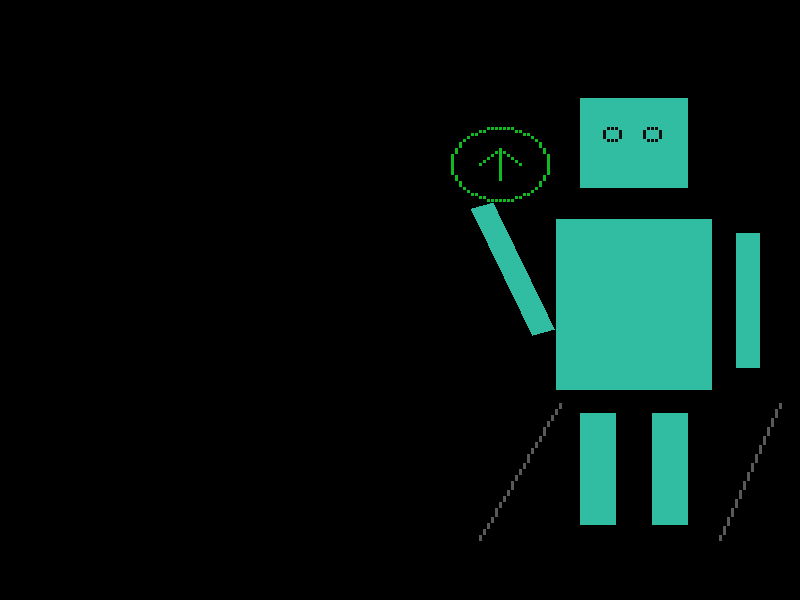

In [ ]:
from IPython.display import display
from PIL import Image

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))